# Data Visualization: Mapping</h1>


In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import json

# import watermark
#%load_ext watermark

plt.style.use('seaborn')
# plt.style.use('d4sci.mplstyle')

## Block map

We're going to build up a block map of the number of cases in each state. We start by loading up the most recent data frrom the JHU github repository

In [2]:
# confirmed_US = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')

confirmed_US = pd.read_csv('../datasets/time_series_covid19_confirmed_US.csv')

And clean it up so that we have just totals per state

In [3]:
confirmed_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,17864,17864,17864,17864,17991,17991,17991,17991,17991,17991
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,63514,63514,63514,63514,64095,64095,64095,64095,64095,64095
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,6553,6553,6553,6553,6650,6650,6650,6650,6650,6650
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,7166,7166,7166,7166,7291,7291,7291,7291,7291,7291
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,16365,16365,16365,16365,16496,16496,16496,16496,16496,16496


In [4]:
del_columns = [
 'UID',
 'iso2',
 'iso3',
 'code3',
 'FIPS',
 'Admin2',
 'Country_Region',
 'Lat',
 'Long_',
 'Combined_Key',
]

In [5]:
confirmed_US.drop(columns=del_columns, inplace=True)
confirmed_US = confirmed_US.groupby('Province_State').sum().T
confirmed_US.index = pd.to_datetime(confirmed_US.index)
confirmed_US = confirmed_US.diff(1).rolling(7).mean()

So we finally have:

In [6]:
confirmed_US

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-26,2238.857143,313.571429,18.0,1215.0,922.428571,11324.285714,709.000000,632.857143,221.714286,0.0,...,2155.285714,7696.285714,449.0,77.571429,35.285714,2488.857143,1110.285714,811.571429,1666.000000,103.714286
2022-08-27,2238.857143,313.571429,18.0,1215.0,925.285714,11324.285714,655.857143,621.571429,221.714286,0.0,...,1969.571429,7696.285714,449.0,77.571429,31.571429,2488.857143,1110.285714,811.571429,1666.000000,103.714286
2022-08-28,2238.857143,313.571429,18.0,1215.0,989.857143,11324.285714,637.714286,598.285714,221.714286,0.0,...,1969.571429,7696.285714,449.0,77.571429,33.571429,2488.857143,1110.285714,811.571429,1666.000000,103.714286
2022-08-29,2238.857143,313.571429,18.0,1215.0,937.714286,7838.714286,921.285714,578.285714,204.571429,0.0,...,2468.285714,7420.857143,449.0,77.571429,42.285714,2502.285714,1291.857143,853.285714,1493.428571,103.714286


We load up the information on the state location for our block map. The x and y coordinates correspond to the location of the states in our map.

In [7]:
states = pd.read_csv('../datasets/states.csv', index_col=0)
states.head()

,x,y,name
index,,,
AL,7,6,Alabama
AK,0,1,Alaska
AZ,2,5,Arizona
AR,5,5,Arkansas
CA,1,4,California


And rename the columns to use the state abbreviations for simplicity

In [8]:
col_dict = dict(states.reset_index()[['name', 'index']].values)
confirmed_US.rename(columns=col_dict, inplace=True)

And finally we can make our plot

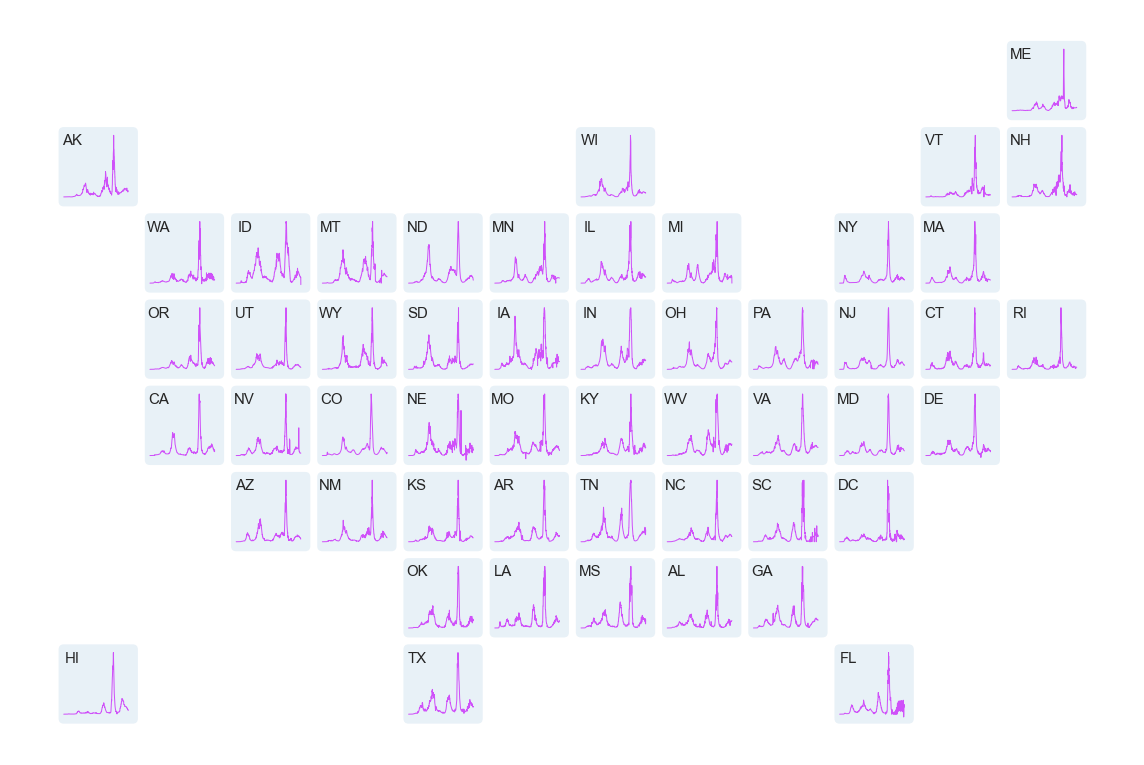

In [9]:
fig, ax = plt.subplots(1, figsize=(16, 22))
ax.set_aspect(1.)
ax.invert_yaxis()

# Each state will be represented by a "FancyBox" patch
patches = []

for state in states.index:
    fancybox = mpatches.FancyBboxPatch([states.x[state]-0.5, states.y[state]-0.5], 0.8, 0.8,
        boxstyle=mpatches.BoxStyle("Round", pad=0.06))
    patches.append(fancybox)

# Add the patches to the plot
collection = PatchCollection(patches, facecolors='#1f77b4', alpha=0.1)
ax.add_collection(collection)

# Finally add the timelines for each state at the corresponding location
x = np.linspace(0., 0.75, confirmed_US.shape[0])

for state in states.index:
    # Timelines are normalized so that they fit within the fancy box.
    timeline = (confirmed_US[state]/(confirmed_US[state].max()*1.4)).fillna(0).values
    
    ax.text(y=states.y[state]-0.4, x=states.x[state]-0.4, 
            s=state, horizontalalignment='center', verticalalignment='center', 
            fontsize=15)
    ax.plot(states.x[state]+x-0.5, states.y[state]-timeline+0.25, lw=1, color='#cf51f9')
ax.axis('off')
fig.tight_layout()

## Manhattan

We are going to use some geographical boundary information for the borough of Manhattan. For simplicity I've extracted the necessary data from the official shapefiles https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm. In this format the data can be easily loaded:

In [10]:
manhattan = json.loads(open("../datasets/Manhattan.json", "rt").readline())

points = np.array(manhattan["points"])
parts = manhattan["parts"]

The data (similarly to shapefiles) is composed of a list of 2D points:

In [11]:
points

array([[-74.01092841,  40.68449147],
       [-74.0119326 ,  40.68388775],
       [-74.01217597,  40.68409519],
       ...,
       [-73.90682823,  40.87663155],
       [-73.90682004,  40.87658553],
       [-73.906651  ,  40.8757525 ]])

And indicators of which points belong to which line.

In [12]:
parts

[0,
 12,
 17,
 22,
 27,
 75,
 81,
 362,
 369,
 377,
 388,
 393,
 399,
 429,
 440,
 447,
 455,
 463,
 474,
 483,
 488,
 493,
 501,
 534,
 542,
 560,
 728,
 758,
 1004,
 6091,
 6104,
 6332,
 6332,
 6332]

This means that the first line is made up of points in position $[0:12)$, the second line of the points $[12:17)$, etc. We can now use this data to easily get a quick map of Manhattan. I've purposefully let matplotlib set the color for each individual line so that we can easily see the different parts of the figure

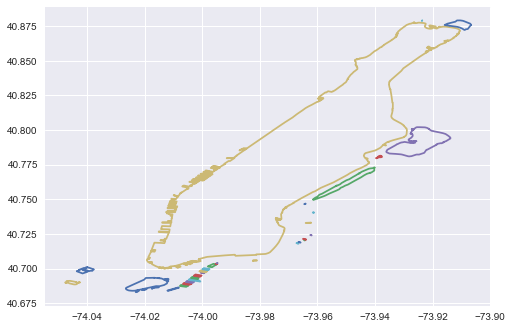

In [13]:
for i in range(len(parts)-1):
	plt.plot(points.T[0][parts[i]:parts[i+1]], points.T[1][parts[i]:parts[i+1]])

Let's add some points stored in a csv file of x, y coordinates

In [14]:
tweets = pd.read_csv('../datasets/tweets.csv')

These are coordinates of real people tweeting with GPS locations enabled on a specific day:

In [15]:
tweets.head()

,X,Y
0,-73.997017,40.762337
1,-73.968542,40.780709
2,-73.985962,40.760342
3,-73.952610,40.810797
4,-73.968542,40.780709


We can now easily plot these points along side the geographical boundaries

In [16]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

(-74.05478355854918, -73.89959706381602, 40.673110890352014, 40.88884410240033)

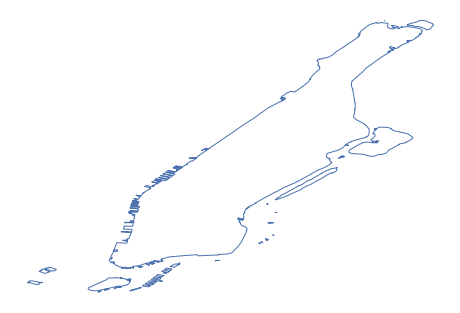

In [17]:
for i in range(len(parts)-1):
	plt.plot(points.T[0][parts[i]:parts[i+1]], 
             points.T[1][parts[i]:parts[i+1]], '-', c=colors[0], lw=1)

plt.plot(tweets['X'], tweets['Y'], '+', c=colors[1])
plt.axis('off')

## Population matrix

Another common format for data is what is known as "raster" file. These are essentially matricies of numbers along with some metadata. Let's take a look at the US population in 2015 according to Columbia's Gridded Population of the World project https://sedac.ciesin.columbia.edu/data/collection/gpw-v4

In [18]:
data = np.loadtxt('../datasets/US_pop.mat')

As you can see this is just a matrix of numbers. nan's are used to denote missing data

In [19]:
data.shape

(119, 246)

In [20]:
data[50,:]

array([           nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan, 1.43647803e+03,
       9.37134521e+02, 7.71265198e+02, 7.78246277e+02, 7.79848511e+02,
       3.08748901e+03, 2.14585605e+04, 4.40342695e+04, 3.14356094e+04,
       4.37279590e+03, 1.89785803e+03, 6.52430420e+03, 1.37475195e+03,
       1.79528894e+03, 1.61386096e+03, 1.17168201e+03, 1.01398602e+03,
       9.70716187e+02, 2.07381699e+02, 1.24349003e+01, 6.72574186e+00,
       2.57071710e+00, 1.25912104e+01, 1.28034401e+01, 1.30428400e+01,
       2.85179405e+01, 2.97565594e+01, 2.97565594e+01, 5.72180710e+01,
       1.06223701e+02, 1.02709297e+02, 9.62921829e+01, 1.12264000e+02,
       1.12264000e+02, 1.12264000e+02, 1.12264000e+02, 1.12264000e+02,
       1.12264000e+02, 1.18276497e+02, 1.45015793e+02, 1.45103897e+02,
       1.45133194e+02, 1.45294296e+02, 1.45463104e+02, 1.90916702e+02,
      

We can get a quick and dirty plot using imshow

In [21]:
data[data>0].max()

3825095.0

(-0.5, 245.5, 118.5, -0.5)

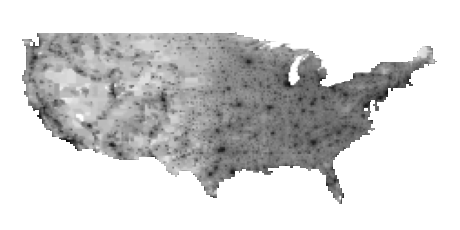

In [22]:
fig, ax = plt.subplots(1,1)
ax.imshow(np.log10(data+1))
ax.axis('off')

In addition to this data, we also need the coordinates of the lower left hand corner and the cell size

In [23]:
xllcorner = -126.5
yllcorner = 22.75
cellsize = 0.25

Using this metadata we can now convert between raw lat/lon and matrix coordinates

In [24]:
def map_points(xllcorner, yllcorner, cellsize, nrows, x, y):
    x = int((x-xllcorner)/cellsize)
    y = (nrows-1)-int((y-yllcorner)/cellsize)

    return x, y

Which is useful when we want to add point or lines to the plot

(-0.5, 245.5, 118.5, -0.5)

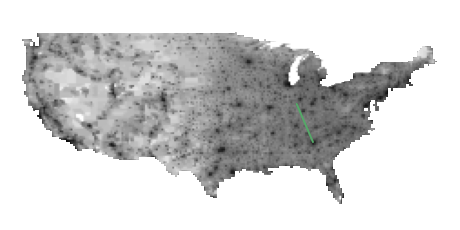

In [25]:
fig, ax = plt.subplots(1,1)
ax.imshow(np.log(data+1))

x1, y1 = map_points(xllcorner, yllcorner, cellsize, data.shape[0], 
                    -86.523435, 39.163355, )
x2, y2 = map_points(xllcorner, yllcorner, cellsize, data.shape[0], 
                    -84.404820, 33.761926, )

ax.plot([x1, x2], [y1, y2], '-', c=colors[1], lw=2)
ax.axis('off')

Add all the state boundaries https://www.usgs.gov/products/data-and-tools/gis-data in the same slightly massaged format as the Manhattan data above

(-0.5, 245.5, 118.5, -0.5)

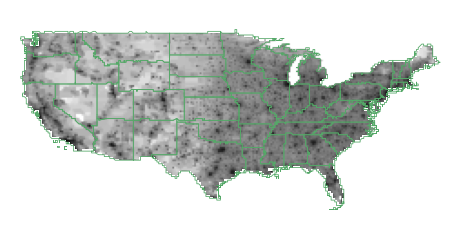

In [26]:
fig, ax = plt.subplots(1,1)
ax.imshow(np.log(data+1))

shapes = json.loads(open("../datasets/48states.json", "rt").readline())

pos = None
count = 0

for shape in shapes:
        points = np.array(shape["points"])
        parts = shape["parts"]

        for i in range(len(parts)-1):
            positions = []

            for j in range(parts[i+1]-parts[i]):
                x_orig = points.T[0][parts[i]+j]
                y_orig = points.T[1][parts[i]+j]
                x, y = map_points(xllcorner, yllcorner, cellsize, data.shape[0], x_orig, y_orig)
                positions.append([x, y])
            
            positions = np.array(positions)

            ax.plot(positions.T[0], positions.T[1], '-', c=colors[1], lw=0.8)

ax.axis('off')

## Data aggregation

The main advantage of being able to easily disply matricies of data is that you can aggregate geographical data into a matrix to plotting.

Define the constants needed to convert between matrix coordinates to lat/lon

In [27]:
xllcorner = -74.0477296269704
yllcorner = 40.68291694544512
xurcorner = -73.9066509953948
yurcorner = 40.87903804730722
cellsize = 0.001

Build a matrix that counts how many tweets occurred in each cell of Manhattan

In [28]:
ncols = int((xurcorner-xllcorner)/cellsize)
nrows = int((yurcorner-yllcorner)/cellsize)

data = np.zeros((nrows, ncols), dtype='int')*np.nan

for tweet_id in range(tweets.shape[0]):
    try:
        coordinates = tweets.iloc[tweet_id]
                    
        coord_x, coord_y = map_points(xllcorner, yllcorner, cellsize, nrows, coordinates[0], coordinates[1])
        
        value = data[coord_y, coord_x]
        
        if np.isnan(value):
            data[coord_y, coord_x] = 1
        else:
            data[coord_y, coord_x] += 1
    except:
        pass
    


Plot the resulting matrix. It should be noted that in practice there is no difference between this matrix and the population matrix we used above

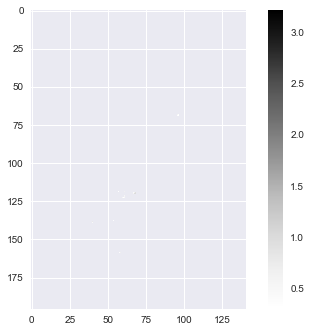

In [29]:
plt.imshow(np.log10(data+1))
plt.colorbar()

Naturally we can also add the boundary information. Reload the data

In [30]:
manhattan = json.loads(open("../datasets/Manhattan.json", "rt").readline())

points = np.array(manhattan["points"])
parts = manhattan["parts"]

Generate the joint plot. Here we use the **extent** parameter to redifine the x,y axis coordinates to be lat and lon. 

(-74.0477296269704, -73.9066509953948, 40.68291694544512, 40.87903804730722)

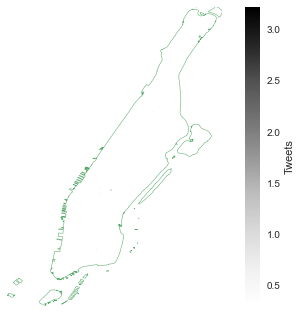

In [31]:
plt.imshow(np.log10(data+1), extent=(xllcorner, xurcorner, yllcorner, yurcorner))

for i in range(len(parts)-1):
	plt.plot(points.T[0][parts[i]:parts[i+1]], points.T[1][parts[i]:parts[i+1]], '-', c=colors[1], lw=0.5)

plt.colorbar(label='Tweets')
plt.axis('off')